# Introduction:
This data is crucial to review in order to determine the best neighborhood in Pittsburgh due to the data allowing historical analysis that would be otherwise unavailable to a newcomer to the city. 

This data will be later used in conjunction with more modern data to help "Steel Vegenence"(Our group's super hero) to see the change in crime overtime. 

# The Metric: 
The metric of this section is the total number of police incident reports per neighborhood in Pittsburgh from 2005 to 2015.

This section also look into the normal distribution of the probability that a neighborhood will have a certain amount of incident reports.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats
%matplotlib inline

reports = pd.read_csv("police.csv", low_memory=False)



num_reports = reports.groupby("INCIDENTNEIGHBORHOOD").nunique()



num_reports = num_reports.sort_values('PK', ascending=True)
std = num_reports["PK"].std()
mean = num_reports["PK"].mean()
print("std: ", std)
print("mean: ", mean)
print("mean: ", num_reports.shape)


std:  1269.4567703080754
mean:  977.1190476190476
mean:  (84, 12)


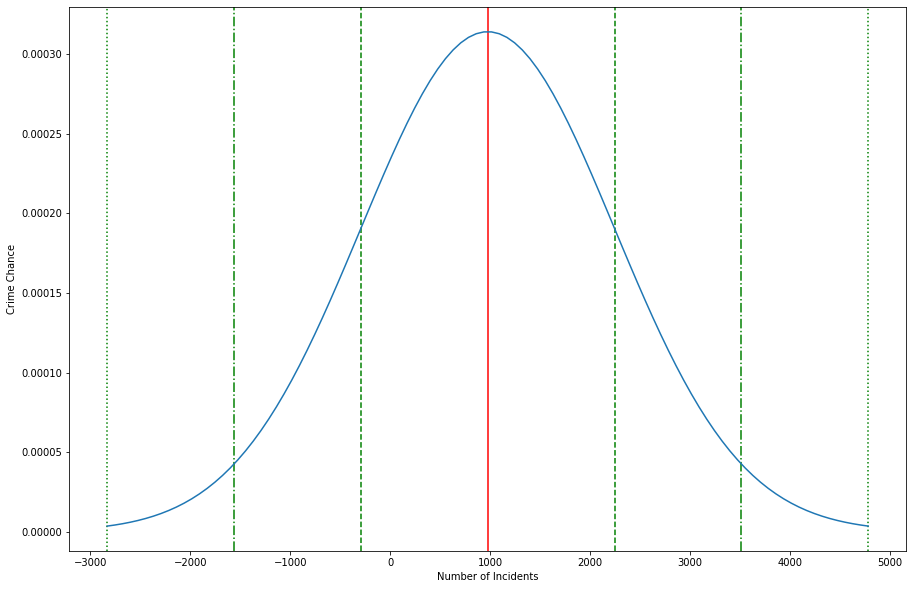

In [5]:
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.figure(figsize=(15,10))
plt.ylabel('Crime Chance')
plt.xlabel('Number of Incidents')
plt.axvline(mean, color='r', linestyle='solid')
plt.axvline((mean + std), color='g', linestyle='--')
plt.axvline((mean - std), color='g', linestyle='--')
plt.axvline((mean + 2*std), color='g', linestyle='-.')
plt.axvline((mean - 2*std), color='g', linestyle='-.')
plt.axvline((mean + 3*std), color='g', linestyle=':')
plt.axvline((mean - 3*std), color='g', linestyle=':')
plt.plot(x, stats.norm.pdf(x, mean, std))
plt.show()

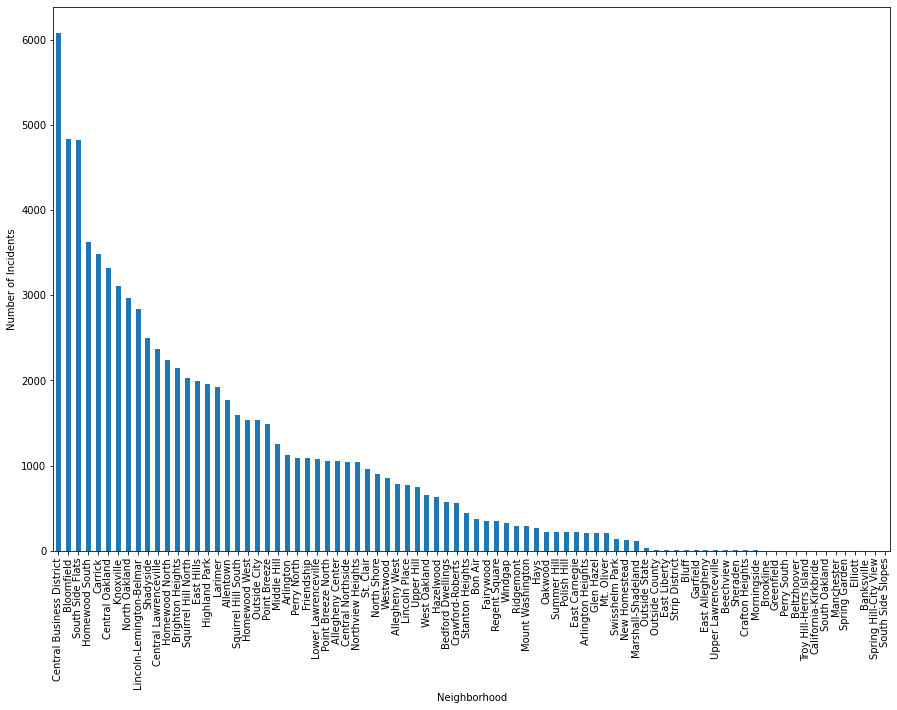

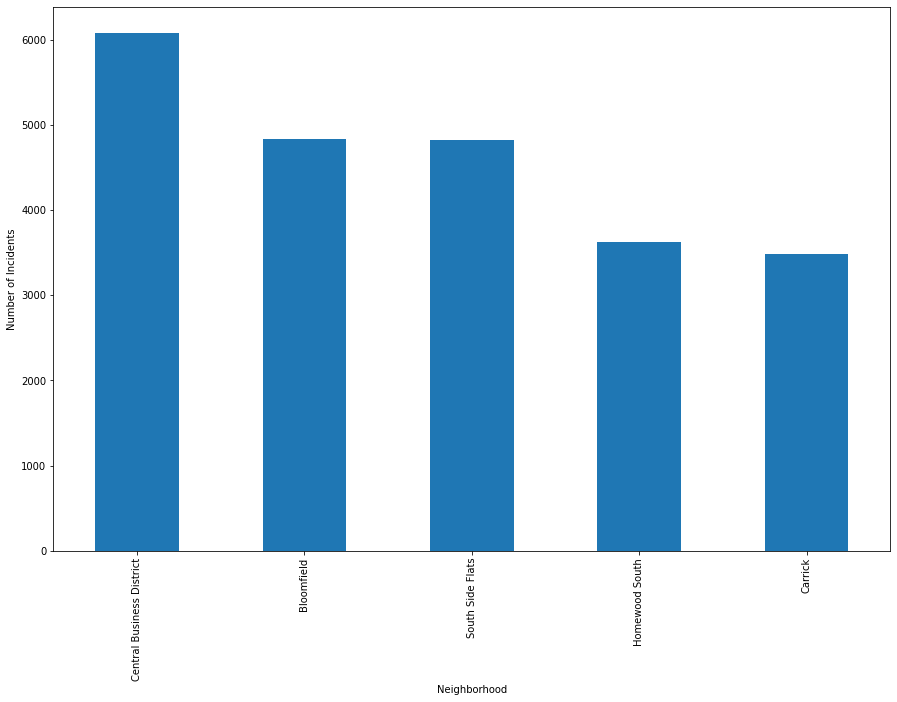

In [13]:
num_reports["PK"].plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

nim_reports = num_reports.sort_values('PK', ascending=False).head()

nim_reports["PK"].head().plot.bar(figsize=(15,10))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.show()

# The Best Neighborhood:
 
Downtown Pittsburgh is the best neighboorhood for "Steel Vengence" to look for a home accoring to only historical data.

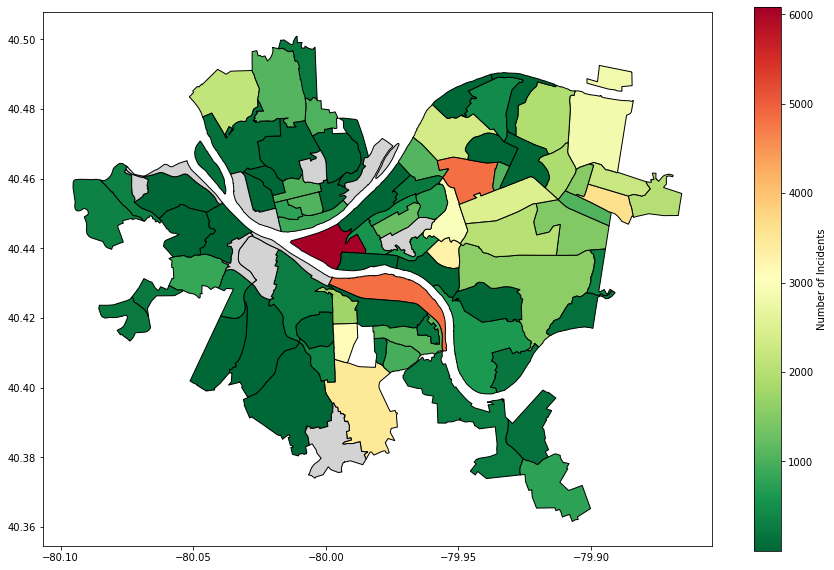

In [7]:
neighborhoods = geopandas.read_file("Pitt/Neighborhoods_.shp")


reports_map = neighborhoods.merge(num_reports["PK"], how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

reports_map[['hood','PK','geometry']]

reports_map.plot(column='PK', cmap=plt.cm.get_cmap('RdYlGn').reversed(), edgecolor="Black", legend=True, legend_kwds={'label': "Number of Incidents"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})


# Conculsion:
    
"Steel Vengence" having gone through my data, now understands that getting a home in Downtown Pittsburgh is his best course of action. 

If he was only looking through historical data as the central part of the city has had over 6000 incident reports written over 10 years. 